# DBSCAN 밀도 기반 클러스터링
- 데이터의 밀도를 기반으로 군집 형성
- 데이터가 붐비는 정도 파악 -> 복잡한 모양의 군집 찾기 -> 노이즈 구분
- 군집에 속하지 않는 데이터를 구분하는 데 효과적임


---

> ##### 입실론(ε, Epsilon)
- 각 데이터를 중심으로 ‘반경(거리)’을 설정한 값
- 이 반경 안에 들어오는 다른 데이터들은 서로 가까운 이웃으로 간주
- **즉, 데이터 간 “이웃 관계”를 결정하는 거리 기준**

> ##### 최소점(MinPts)
- 어떤 점이 **‘밀집된 지역(클러스터 중심)’으로 인정받기 위한 최소 이웃 수**
- 자신을 포함해 이웃한 점이 MinPts 이상이면, 그 점은 **핵심점(Core Point)** 으로 분류됨

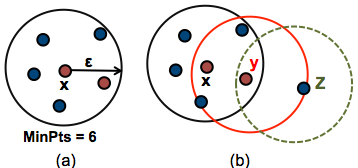

---

##### 군집 형성 과정
1. 핵심점(Core point):
- 설정한 반경(ε) 안에 최소 이웃 수(MinPts) 이상이 존재하는 점
- 밀집 지역에 중심 역할을 하는 점
2. 경계점(Border point):
- 스스로는 핵심점이 될 만큼 이웃이 많지 않지만, 다른 핵심점의 반경 안에 포함되어 있는 점
- 핵심점 근처의 경계 영역에 위치한 점
3. 노이즈(Noise, Outlier):
- 어느 클러스터에도 속하지 않은 점
- 고립된 데이터

장점:
- 군집 개수를 미리 지정할 필요 없음
- 데이터 밀도 차이가 있거나 비원형 형태의 군집도 잘 탐지
- 노이즈(이상치)를 효과적으로 식별

사용 시기:
- 데이터의 분포 형태를 미리 알 수 없을 때
- 노이즈가 많을 것으로 예상될 때 (예: 상권 분석, 위치 기반 데이터 등)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN

In [ ]:
# 1. 초승달 모양의 샘플 데이터 생성
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [ ]:
# 2. 알고리즘 적용
# K-Means (군집 개수 k=2로 지정)
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

In [ ]:
# DBSCAN 적용
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

In [ ]:
# X y 데이터 시각화
# 3. 시각화
plt.figure(figsize=(12, 4))

# 원본 데이터 시각화
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
plt.title('Original Data')

# K-Means 결과 시각화
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')

# DBSCAN 결과 시각화
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()